#### Problem Solving using Python  -  [`problemsolving.io`](https://problemsolving.io/)


# Week 12 : Design Strategies - Simplification & Generalization

# The Problem - "World's Hardest Sudoku" (2012)

Based on [Peter Norvig](http://norvig.com/)'s essay "Solving Every Sudoku Puzzle"

<img src="https://secure.i.telegraph.co.uk/multimedia/archive/02260/Untitled-1_2260717b.jpg" />

In [1]:
from IPython.display import IFrame
IFrame('https://www.telegraph.co.uk/news/science/science-news/9359579/Worlds-hardest-sudoku-can-you-crack-it.html',
       width=700, height=350)

First we have to agree on some notation. A Sudoku puzzle is a *grid* of 81 squares; the majority of enthusiasts label the columns 1-9, the rows A-I, and call a collection of nine squares (column, row, or box) a *unit* and the squares that share a unit the *peers*. A puzzle leaves some squares blank and fills others with digits, and the whole idea is:

### A puzzle is solved if the squares in each unit are filled with a permutation of the digits 1 to 9.

That is, no digit can appear twice in a unit, and every digit must appear once. This implies that each square must have a different value from any of its peers. Here are the names of the squares, a typical puzzle, and the solution to the puzzle:
```
 A1 A2 A3| A4 A5 A6| A7 A8 A9    4 . . |. . . |8 . 5     4 1 7 |3 6 9 |8 2 5 
 B1 B2 B3| B4 B5 B6| B7 B8 B9    . 3 . |. . . |. . .     6 3 2 |1 5 8 |9 4 7
 C1 C2 C3| C4 C5 C6| C7 C8 C9    . . . |7 . . |. . .     9 5 8 |7 2 4 |3 1 6 
---------+---------+---------    ------+------+------    ------+------+------
 D1 D2 D3| D4 D5 D6| D7 D8 D9    . 2 . |. . . |. 6 .     8 2 5 |4 3 7 |1 6 9 
 E1 E2 E3| E4 E5 E6| E7 E8 E9    . . . |. 8 . |4 . .     7 9 1 |5 8 6 |4 3 2 
 F1 F2 F3| F4 F5 F6| F7 F8 F9    . . . |. 1 . |. . .     3 4 6 |9 1 2 |7 5 8 
---------+---------+---------    ------+------+------    ------+------+------
 G1 G2 G3| G4 G5 G6| G7 G8 G9    . . . |6 . 3 |. 7 .     2 8 9 |6 4 3 |5 7 1 
 H1 H2 H3| H4 H5 H6| H7 H8 H9    5 . . |2 . . |. . .     5 7 3 |2 9 1 |6 8 4 
 I1 I2 I3| I4 I5 I6| I7 I8 I9    1 . 4 |. . . |. . .     1 6 4 |8 7 5 |2 9 3 
```

Every square has exactly 3 units and 20 peers. For example, here are the units and peers for the square `C2`:
```
    A2   |         |                    |         |            A1 A2 A3|         |         
    B2   |         |                    |         |            B1 B2 B3|         |         
    C2   |         |            C1 C2 C3| C4 C5 C6| C7 C8 C9   C1 C2 C3|         |         
---------+---------+---------  ---------+---------+---------  ---------+---------+---------
    D2   |         |                    |         |                    |         |         
    E2   |         |                    |         |                    |         |         
    F2   |         |                    |         |                    |         |         
---------+---------+---------  ---------+---------+---------  ---------+---------+---------
    G2   |         |                    |         |                    |         |         
    H2   |         |                    |         |                    |         |         
    I2   |         |                    |         |                    |         |         
```

## And Now, Let's Solve It!

<div class="alert alert-info">
  <h4>Programming Problem Solving Model</h4>
  <ol>
    <li>Reinterpret the Problem</li>
    <li>Design a Solution</li>
    <li>Code</li>
    <li>Test</li>
    <li>Debug</li>
    <li>Evaluate & Reflect</li>
</ol>
</div>

<div class="alert alert-info">
  <h4>Incremental Development</h4>
  <ul>
    <li>Rapid cycles of <i>Problem + Design + Code + Test + Debug</i></li>
    <li>Start small and keep it working</li>
  </ul>
</div>

<a id="problem-phase-top"></a>
<div class="alert alert-info">
<h3>Reinterpret the Problem</h3>
</div>

- 9x9 grid
- Each square filled with one digit of 1...9
- For every unit, the digit for each square is unique / there are no two squares with the same digit
  - Row
  - Column
  - Box
- If there is no solution, return `False`

### As Blackbox (Input/Output) - Which Represnetation?

```python
"8..........36......7..9.2...5...7.......457.....1...3...1....68..85...1..9....4.."
```

```python
"""
800000000
003600000
070090200
050007000
000045700
000100030
001000068
008500010
090000400
"""
```

```python
"""
8 . . |. . . |. . . 
. . 3 |6 . . |. . . 
. 7 . |. 9 . |2 . . 
------+------+------
. 5 . |. . 7 |. . . 
. . . |. 4 5 |7 . . 
. . . |1 . . |. 3 . 
------+------+------
. . 1 |. . . |. 6 8 
. . 8 |5 . . |. 1 . 
. 9 . |. . . |4 . . 
"""
```

<div class="alert alert-info">
<h3>Design a Solution</h3>
</div>

- I don't know how to solve Sudoku programmatically, this is too difficult!
- What can I solve? Maybe a **simpler** problem?
- Less "constraints"
   - Row
   - Column
- This is a [**Latin Square**](https://en.wikipedia.org/wiki/Latin_square)!
- So, let's solve a Latin square, this is a **simplified problem** of Soduku

<hr style="height: 10px; background-color:black;">

# Simplified Problem - Latin Square

<a id="problem-phase-top"></a>
<div class="alert alert-info">
<h3>Reinterpret the Problem</h3>
</div>

- 9x9 grid
- Each square filled with one digit of 1...9
- For every unit, the digit for each square is unique / there are no two squares with the same digit
  - Row
  - Column
- If there is no solution, return `False`
  
<div class="alert alert-info">
<h3>Design a Solution</h3>
</div>

- I don't know how to solve  Latin Square programmatically, this is too difficult!
- What can I solve? Maybe a **simpler** problem?

#### Idea: What is the simplest Latin Square problem I can come up with?

<hr style="height: 10px; background-color:black;">

# Even More Simplified Problem - Latin Square with only one Square Missing!


<a id="problem-phase-top"></a>
<div class="alert alert-info">
<h3>Reinterpret the Problem</h3>
</div>

- 9x9 grid
- Each square filled with one digit of 1...9
- For every unit, the digit for each square is unique / there are no two squares with the same digit
  - Row
  - Column
- **Only one square is unfilled**
- If there is no solution, return `False`

```python
"4839216579673458212518764935481.2976729564138136798245372689514814253769695417382"

"""
4 8 3 |9 2 1 |6 5 7 
9 6 7 |3 4 5 |8 2 1 
2 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 . 2 |9 7 6 
7 2 9 |5 6 4 |1 3 8 
1 3 6 |7 9 8 |2 4 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |2 5 3 |7 6 9 
6 9 5 |4 1 7 |3 8 2 
"""
```

In [2]:
even_more_grid = "4839216579673458212518764935481.2976729564138136798245372689514814253769695417382"

<div class="alert alert-info">
<h3>Design a Solution</h3>
</div>


```python

def solve_even_more_simplified_latin_square(grid):
    
    values = parse_grid(grid)
    
    solved_values = solve_values(values)
    
    if solved_values:
        return compose_grid(values)
    else:
        return False
```

<div class="alert alert-warning">
<h1>Think-Pair-Share - <code>solve_values</code> - How would you solve it?</h1>

<h3>Design Aspects</h3>

1. Flow - Transformation

2. Data - Representation


> "Data dominates. If you've chosen the right data structures and organized things well, the algorithms will almost always be self-evident. Data structures, not algorithms, are central to programming." - Rob Pike

</div>

### Flow - Transformation

In [3]:
# 1. Iterate over all squares
#    1.1. If the square is empty
#         1.1.1 Collect the numbers in the row and colum units
#         1.1.2 Find the missing number from the range 1..9
#         1.1.3 If there is no such number, reuturn False
#         1.1.3 Otherwise, assign this number to the square

#### Breaking into sub-problems
1. Collect the numbers in the row and column units
2. Find the missing number from the range 1..9
3. Assign this number to the square

Therefore, it would be helpful to solve these sub-problems:  
1. **Get the peers of a given square**
2. **Get the values of the peers of a given square**
3. **Find the missing number**

### Data - Representation

#### Options
1. List of list of digits (str? int?)
2. Dict of str (square, e.g. C3) to digit (str? int)

### Given all of that, what would serve us the best?
- We care only about the peers (refer to flow)
- The 2D structure helps us to get the peers from the data strucutre itself
- But we can also precompute all of them!
- Then using flat data strucutre (`dict` of `str:str`) is easier than neasted one (`list` of `list` of `str`)

### Verdict - values: `dict` of `str:str` (square : value)

### More Reasoning
- How can we find the missing number given the peers of a square?
- We need:
  - Collect numbers
  - Remove them from 1..9
  - We don't care about repetition
- Data structure? `set`!
- Therefore, **put the values of all peers in a set, and substruct it from the `set(range(1, 10))`**

<div class="alert alert-info">
<h3>Code</h3>
</div>

In [4]:
##   r is a row,    e.g. 'A'
##   c is a column, e.g. '3'
##   s is a square, e.g. 'A3'
##   d is a digit,  e.g. '9'
##   u is a unit,   e.g. ['A1','B1','C1','D1','E1','F1','G1','H1','I1']

def cross(A, B):
    "Cross product of elements in A and elements in B."
    return [a+b for a in A for b in B]

digits   = '123456789'
rows     = 'ABCDEFGHI'
cols     = digits
squares  = cross(rows, cols)
unitlist = ([cross(rows, c) for c in cols] +
            [cross(r, cols) for r in rows])

units = dict((s, [u for u in unitlist if s in u])
             for s in squares)
peers = dict((s, set(sum(units[s],[]))-set([s]))
             for s in squares)


def generate_grid_values(grid):
    "Convert grid into a dict of {square: char} with '0' or '.' for empties."
    chars = [ch for ch in grid if ch in digits or ch in '0.']
    if len(chars) != 81:
        print(grid, chars, len(chars))
    assert len(chars) == 81
    return dict(zip(squares, chars))


def display(values):
    "Display these values as a 2-D grid."
    width = 1+max(len(values[s]) for s in squares)
    line = '+'.join(['-'*(width*3)]*3)
    for r in rows:
        print(''.join(values[r+c].center(width) + ('|' if c in '36' else '')
                      for c in cols))
        if r in 'CF': print(line)
    print()
    

def display_set(values):
    "Display these values as set as a 2-D grid."
    digit_values = {s: ''.join(sorted(d)) for s,d in values.items()}
    display(digit_values)

In [5]:
peers['A4']

{'A1',
 'A2',
 'A3',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'B4',
 'C4',
 'D4',
 'E4',
 'F4',
 'G4',
 'H4',
 'I4'}

In [6]:
even_more_values = generate_grid_values(even_more_grid)

even_more_values

{'A1': '4',
 'A2': '8',
 'A3': '3',
 'A4': '9',
 'A5': '2',
 'A6': '1',
 'A7': '6',
 'A8': '5',
 'A9': '7',
 'B1': '9',
 'B2': '6',
 'B3': '7',
 'B4': '3',
 'B5': '4',
 'B6': '5',
 'B7': '8',
 'B8': '2',
 'B9': '1',
 'C1': '2',
 'C2': '5',
 'C3': '1',
 'C4': '8',
 'C5': '7',
 'C6': '6',
 'C7': '4',
 'C8': '9',
 'C9': '3',
 'D1': '5',
 'D2': '4',
 'D3': '8',
 'D4': '1',
 'D5': '.',
 'D6': '2',
 'D7': '9',
 'D8': '7',
 'D9': '6',
 'E1': '7',
 'E2': '2',
 'E3': '9',
 'E4': '5',
 'E5': '6',
 'E6': '4',
 'E7': '1',
 'E8': '3',
 'E9': '8',
 'F1': '1',
 'F2': '3',
 'F3': '6',
 'F4': '7',
 'F5': '9',
 'F6': '8',
 'F7': '2',
 'F8': '4',
 'F9': '5',
 'G1': '3',
 'G2': '7',
 'G3': '2',
 'G4': '6',
 'G5': '8',
 'G6': '9',
 'G7': '5',
 'G8': '1',
 'G9': '4',
 'H1': '8',
 'H2': '1',
 'H3': '4',
 'H4': '2',
 'H5': '5',
 'H6': '3',
 'H7': '7',
 'H8': '6',
 'H9': '9',
 'I1': '6',
 'I2': '9',
 'I3': '5',
 'I4': '4',
 'I5': '1',
 'I6': '7',
 'I7': '3',
 'I8': '8',
 'I9': '2'}

In [7]:
display(even_more_values)

4 8 3 |9 2 1 |6 5 7 
9 6 7 |3 4 5 |8 2 1 
2 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 . 2 |9 7 6 
7 2 9 |5 6 4 |1 3 8 
1 3 6 |7 9 8 |2 4 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |2 5 3 |7 6 9 
6 9 5 |4 1 7 |3 8 2 



<div class="alert alert-info">
<h3>Incremental Development - First Sub-Problem - Get the values of the peers of a given square</h3>
</div>

In [8]:
even_more_values['D5']

'.'

In [9]:
peers['D5']

{'A5',
 'B5',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D6',
 'D7',
 'D8',
 'D9',
 'E5',
 'F5',
 'G5',
 'H5',
 'I5'}

In [10]:
[even_more_values[peer_s] for peer_s in peers['D5']]

['2',
 '4',
 '6',
 '7',
 '1',
 '6',
 '7',
 '5',
 '5',
 '9',
 '8',
 '4',
 '9',
 '8',
 '2',
 '1']

In [11]:
{even_more_values[peer_s] for peer_s in peers['D5']}

{'1', '2', '4', '5', '6', '7', '8', '9'}

In [12]:
def get_peers_values(square, values):
    return {values[peer_square] for peer_square in peers[square]}

In [13]:
get_peers_values('D5', even_more_values)

{'1', '2', '4', '5', '6', '7', '8', '9'}

<div class="alert alert-warning">
<h1>Pair Programming</h1>
</div>

<div class="alert alert-info">
<h3>Incremental Development - Second Sub-Problem - Find the missing number</h3>
</div>

In [14]:
### HIDDEN

peers_values = get_peers_values('D5', even_more_values)
set(digits) - peers_values

{'3'}

In [15]:
def find_missing_number(square, values):
### SOLUTION BEGIN
    peers_values = get_peers_values(square, values)
    possibilites = set(digits) - peers_values
    assert len(possibilites) == 1
    return possibilites.pop()
### SOLUTION END

In [16]:
assert find_missing_number('D5', even_more_values) == '3'

<div class="alert alert-info">
<h3>Incremental Development - Combine it all together</h3>
</div>

In [17]:
### HIDDEN

even_more_values = generate_grid_values(even_more_grid)

solved_even_more_values = {}

for s,d in even_more_values.items():
    if d == '.':
        solved_even_more_values[s] = find_missing_number(s, even_more_values)
    else:
        solved_even_more_values[s] = d

In [18]:
### HIDDEN

solved_even_more_values

{'A1': '4',
 'A2': '8',
 'A3': '3',
 'A4': '9',
 'A5': '2',
 'A6': '1',
 'A7': '6',
 'A8': '5',
 'A9': '7',
 'B1': '9',
 'B2': '6',
 'B3': '7',
 'B4': '3',
 'B5': '4',
 'B6': '5',
 'B7': '8',
 'B8': '2',
 'B9': '1',
 'C1': '2',
 'C2': '5',
 'C3': '1',
 'C4': '8',
 'C5': '7',
 'C6': '6',
 'C7': '4',
 'C8': '9',
 'C9': '3',
 'D1': '5',
 'D2': '4',
 'D3': '8',
 'D4': '1',
 'D5': '3',
 'D6': '2',
 'D7': '9',
 'D8': '7',
 'D9': '6',
 'E1': '7',
 'E2': '2',
 'E3': '9',
 'E4': '5',
 'E5': '6',
 'E6': '4',
 'E7': '1',
 'E8': '3',
 'E9': '8',
 'F1': '1',
 'F2': '3',
 'F3': '6',
 'F4': '7',
 'F5': '9',
 'F6': '8',
 'F7': '2',
 'F8': '4',
 'F9': '5',
 'G1': '3',
 'G2': '7',
 'G3': '2',
 'G4': '6',
 'G5': '8',
 'G6': '9',
 'G7': '5',
 'G8': '1',
 'G9': '4',
 'H1': '8',
 'H2': '1',
 'H3': '4',
 'H4': '2',
 'H5': '5',
 'H6': '3',
 'H7': '7',
 'H8': '6',
 'H9': '9',
 'I1': '6',
 'I2': '9',
 'I3': '5',
 'I4': '4',
 'I5': '1',
 'I6': '7',
 'I7': '3',
 'I8': '8',
 'I9': '2'}

In [19]:
### HIDDEN

display(even_more_values)

print('='*19)
print()

display(solved_even_more_values)

4 8 3 |9 2 1 |6 5 7 
9 6 7 |3 4 5 |8 2 1 
2 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 . 2 |9 7 6 
7 2 9 |5 6 4 |1 3 8 
1 3 6 |7 9 8 |2 4 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |2 5 3 |7 6 9 
6 9 5 |4 1 7 |3 8 2 


4 8 3 |9 2 1 |6 5 7 
9 6 7 |3 4 5 |8 2 1 
2 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 3 2 |9 7 6 
7 2 9 |5 6 4 |1 3 8 
1 3 6 |7 9 8 |2 4 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |2 5 3 |7 6 9 
6 9 5 |4 1 7 |3 8 2 



In [20]:
def solve_even_more(grid):
### SOLUTION BEGIN

    values = generate_grid_values(grid)

    solved_values = {}

    for s,d in values.items():
        if d == '.':
            solved_values[s] = find_missing_number(s, values)
        else:
            solved_values[s] = d
            
    return solved_values
### SOLUTION END

<a id="problem-phase-top"></a>
<div class="alert alert-info">
<h3>Test</h3>
</div

In [21]:
display(solve_even_more(even_more_grid))

4 8 3 |9 2 1 |6 5 7 
9 6 7 |3 4 5 |8 2 1 
2 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 3 2 |9 7 6 
7 2 9 |5 6 4 |1 3 8 
1 3 6 |7 9 8 |2 4 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |2 5 3 |7 6 9 
6 9 5 |4 1 7 |3 8 2 



In [22]:
even_more_grid

'4839216579673458212518764935481.2976729564138136798245372689514814253769695417382'

<hr style="height: 10px; background-color:black;">

# Back to Simplified Problem - Latin Square

<a id="problem-phase-top"></a>
<div class="alert alert-info">
<h3>Reinterpret the Problem</h3>
</div>

### Does our program solve the simplified problem?


#### Only one squre is unfilled per column and row

In [23]:
latin1_grid = "4.392165796.345821.518764935481.297672956.1381367982.5372689514814.53769695417.82"

latin1_values = generate_grid_values(latin1_grid)

display(latin1_values)

display(solve_even_more(latin1_grid))

4 . 3 |9 2 1 |6 5 7 
9 6 . |3 4 5 |8 2 1 
. 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 . 2 |9 7 6 
7 2 9 |5 6 . |1 3 8 
1 3 6 |7 9 8 |2 . 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |. 5 3 |7 6 9 
6 9 5 |4 1 7 |. 8 2 

4 8 3 |9 2 1 |6 5 7 
9 6 7 |3 4 5 |8 2 1 
2 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 3 2 |9 7 6 
7 2 9 |5 6 4 |1 3 8 
1 3 6 |7 9 8 |2 4 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |2 5 3 |7 6 9 
6 9 5 |4 1 7 |3 8 2 



#### Only one squre is unfilled per column or row

In [24]:
latin2_grid = "4.392165.96.345821.518764935481.297672956.1381367982.5372689514814.53769695417.82"

display(generate_grid_values(latin2_grid))

display(solve_even_more(latin2_grid))

4 . 3 |9 2 1 |6 5 . 
9 6 . |3 4 5 |8 2 1 
. 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 . 2 |9 7 6 
7 2 9 |5 6 . |1 3 8 
1 3 6 |7 9 8 |2 . 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |. 5 3 |7 6 9 
6 9 5 |4 1 7 |. 8 2 

4 8 3 |9 2 1 |6 5 7 
9 6 7 |3 4 5 |8 2 1 
2 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 3 2 |9 7 6 
7 2 9 |5 6 4 |1 3 8 
1 3 6 |7 9 8 |2 4 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |2 5 3 |7 6 9 
6 9 5 |4 1 7 |3 8 2 



#### More than one squre is unfilled per column or row

In [25]:
latin3_grid = "..392165796.345821.518764935481.297672956.1381367982.5372689514814.53769695417.82"

display(generate_grid_values(latin3_grid))

display(solve_even_more(latin3_grid))

. . 3 |9 2 1 |6 5 7 
9 6 . |3 4 5 |8 2 1 
. 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 . 2 |9 7 6 
7 2 9 |5 6 . |1 3 8 
1 3 6 |7 9 8 |2 . 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |. 5 3 |7 6 9 
6 9 5 |4 1 7 |. 8 2 

4 8 3 |9 2 1 |6 5 7 
9 6 7 |3 4 5 |8 2 1 
2 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 3 2 |9 7 6 
7 2 9 |5 6 4 |1 3 8 
1 3 6 |7 9 8 |2 4 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |2 5 3 |7 6 9 
6 9 5 |4 1 7 |3 8 2 



#### Two Step Solving

In [26]:
latin4_grid = "..39.165796.345821.518764935481.297672956.1381367982.5372689514814.53769695417.82"

display(generate_grid_values(latin4_grid))

display(solve_even_more(latin4_grid))

. . 3 |9 . 1 |6 5 7 
9 6 . |3 4 5 |8 2 1 
. 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 . 2 |9 7 6 
7 2 9 |5 6 . |1 3 8 
1 3 6 |7 9 8 |2 . 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |. 5 3 |7 6 9 
6 9 5 |4 1 7 |. 8 2 



AssertionError: 

In [ ]:
latin4_values = generate_grid_values(latin4_grid)
display(latin4_values)

In [ ]:
set(digits) - get_peers_values('B1', latin4_values)

In [27]:
set(digits) - get_peers_values('A2', latin4_values)

NameError: name 'latin4_values' is not defined

In [28]:
set(digits) - get_peers_values('A5', latin4_values)

NameError: name 'latin4_values' is not defined

In [29]:
set(digits) - get_peers_values('A1', latin4_values)

NameError: name 'latin4_values' is not defined

In [30]:
### HIDDEN

def find_missing_number(square, values):
    peers_values = get_peers_values(square, values)
    possibilites = set(digits) - peers_values
    if len(possibilites) == 1:
        return possibilites.pop()
    else:  # if cannot solve right now
        return '.'

    
def solve_even_more_values(values):
    solved_values = {}

    for s,d in values.items():
        if d == '.':
            solved_values[s] = find_missing_number(s, values)
        else:
            solved_values[s] = d
            
    return solved_values

In [31]:
latin4_values = generate_grid_values(latin4_grid)
display(latin4_values)

. . 3 |9 . 1 |6 5 7 
9 6 . |3 4 5 |8 2 1 
. 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 . 2 |9 7 6 
7 2 9 |5 6 . |1 3 8 
1 3 6 |7 9 8 |2 . 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |. 5 3 |7 6 9 
6 9 5 |4 1 7 |. 8 2 



In [32]:
latin4_values = solve_even_more_values(latin4_values)
display(latin4_values)

. 8 3 |9 2 1 |6 5 7 
9 6 7 |3 4 5 |8 2 1 
2 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 3 2 |9 7 6 
7 2 9 |5 6 4 |1 3 8 
1 3 6 |7 9 8 |2 4 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |2 5 3 |7 6 9 
6 9 5 |4 1 7 |3 8 2 



In [33]:
latin4_values = solve_even_more_values(latin4_values)
display(latin4_values)

4 8 3 |9 2 1 |6 5 7 
9 6 7 |3 4 5 |8 2 1 
2 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 3 2 |9 7 6 
7 2 9 |5 6 4 |1 3 8 
1 3 6 |7 9 8 |2 4 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |2 5 3 |7 6 9 
6 9 5 |4 1 7 |3 8 2 



### Now, running `solve_even_more_values` in a loop


<div class="alert alert-warning">
<h1>Think-Pair-Share - Which loop?</h1>

1. If `for` - what it the sequence?

2. If `while` - what is the condition?

</div>

In [34]:
latin4_values = generate_grid_values(latin4_grid)

is_changed = True

while is_changed:

    # In every iteration we assume that there is no change
    is_changed = False

    # Iterate over all the squares
    for s,d in latin4_values.items():
        
        # Unknown digit in the square
        if d == '.':
            assigned_d = find_missing_number(s, latin4_values)
            
            # A new assignment was made
            # therefore we should perform all the solving again
            if assigned_d != '.':
                is_changed = True
            
            latin4_values[s] = assigned_d

        else:
            latin4_values[s] = d
            
display(latin4_values)

4 8 3 |9 2 1 |6 5 7 
9 6 7 |3 4 5 |8 2 1 
2 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 3 2 |9 7 6 
7 2 9 |5 6 4 |1 3 8 
1 3 6 |7 9 8 |2 4 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |2 5 3 |7 6 9 
6 9 5 |4 1 7 |3 8 2 



##### As a function

In [35]:
def solve_one_missing_latin(values):
    is_changed = True

    while is_changed:

        # In Every iteration we assume that there is no change
        is_changed = False

        # Iterate over all the squares
        for s,d in values.items():

            # Unknown digit in the square
            if d == '.':
                assigned_d = find_missing_number(s, values)

                # A new assignment was made
                # therefore we should perform all the solving again
                if assigned_d != '.':
                    is_changed = True

                values[s] = assigned_d

            else:
                values[s] = d
        
    return values

In [36]:
latin4_values = generate_grid_values(latin4_grid)
display(latin4_values)

display(solve_one_missing_latin(latin4_values))

. . 3 |9 . 1 |6 5 7 
9 6 . |3 4 5 |8 2 1 
. 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 . 2 |9 7 6 
7 2 9 |5 6 . |1 3 8 
1 3 6 |7 9 8 |2 . 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |. 5 3 |7 6 9 
6 9 5 |4 1 7 |. 8 2 

4 8 3 |9 2 1 |6 5 7 
9 6 7 |3 4 5 |8 2 1 
2 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 3 2 |9 7 6 
7 2 9 |5 6 4 |1 3 8 
1 3 6 |7 9 8 |2 4 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |2 5 3 |7 6 9 
6 9 5 |4 1 7 |3 8 2 



# We have just discoverd [Constraint Propagation](https://en.wikipedia.org/wiki/Constraint_satisfaction)!!!

<hr style="height: 10px; background-color:black;">

# Back to The Original Problem - Sudoku

<a id="problem-phase-top"></a>
<div class="alert alert-info">
<h3>Reinterpret the Problem</h3>
</div>


![single-possibility-rule](http://www.sudokudragon.com/gridsingleposs.png)
Single possibility rule. Source: http://www.sudokudragon.com


### First of all - we need to add the box (=subgrid) constrains

Let's have a clean plate, we will copy-paste all our relavent work with proper names.

<div class="alert alert-warning">
<h1>Pair Programming</h1>

Add the box units to `unitlist`, use the `cross` function.

</div>

```
 A1 A2 A3| A4 A5 A6| A7 A8 A9
 B1 B2 B3| B4 B5 B6| B7 B8 B9
 C1 C2 C3| C4 C5 C6| C7 C8 C9
---------+---------+---------
 D1 D2 D3| D4 D5 D6| D7 D8 D9
 E1 E2 E3| E4 E5 E6| E7 E8 E9
 F1 F2 F3| F4 F5 F6| F7 F8 F9
---------+---------+---------
 G1 G2 G3| G4 G5 G6| G7 G8 G9
 H1 H2 H3| H4 H5 H6| H7 H8 H9
 I1 I2 I3| I4 I5 I6| I7 I8 I9
```

In [37]:
# the 18 unitlist of a latin square (what we've used until now)

unitlist

[['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1'],
 ['A2', 'B2', 'C2', 'D2', 'E2', 'F2', 'G2', 'H2', 'I2'],
 ['A3', 'B3', 'C3', 'D3', 'E3', 'F3', 'G3', 'H3', 'I3'],
 ['A4', 'B4', 'C4', 'D4', 'E4', 'F4', 'G4', 'H4', 'I4'],
 ['A5', 'B5', 'C5', 'D5', 'E5', 'F5', 'G5', 'H5', 'I5'],
 ['A6', 'B6', 'C6', 'D6', 'E6', 'F6', 'G6', 'H6', 'I6'],
 ['A7', 'B7', 'C7', 'D7', 'E7', 'F7', 'G7', 'H7', 'I7'],
 ['A8', 'B8', 'C8', 'D8', 'E8', 'F8', 'G8', 'H8', 'I8'],
 ['A9', 'B9', 'C9', 'D9', 'E9', 'F9', 'G9', 'H9', 'I9'],
 ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9'],
 ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9'],
 ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'],
 ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9'],
 ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9'],
 ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9'],
 ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9'],
 ['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9'],
 ['I1', 'I2', 'I3', 'I4', 'I5',

In [38]:
# upper-left Box
cross('ABC', '123')

['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']

In [39]:
unitlist = ([cross(rows, c) for c in cols] + # columns
            [cross(r, cols) for r in rows] + # rows
            [ ])                             # boxes - YOUR CODE

In [40]:
### HIDDEN

unitlist = ([cross(rows, c) for c in cols] + # columns
            [cross(r, cols) for r in rows] + # rows
            [cross(rs, cs) for rs in ('ABC','DEF','GHI') for cs in ('123','456','789')])

In [41]:
assert len(unitlist) == 27

In [42]:
units = dict((s, [u for u in unitlist if s in u])
             for s in squares)
peers = dict((s, set(sum(units[s],[]))-set([s]))
             for s in squares)

In [43]:
def get_peers_values(square, values):
    return {values[peer_square] for peer_square in peers[square]}


def find_missing_number(square, values):
    peers_values = get_peers_values(square, values)
    possibilites = set(digits) - peers_values
    if len(possibilites) == 1:
        return possibilites.pop()
    else:  # if cannot solve right now
        return '.'
    
    
def solve_one_missing_latin(values):
    is_changed = True

    while is_changed:

        # In Every iteration we assume that there is no change
        is_changed = False

        # Iterate over all the squares
        for s,d in values.items():

            # Unknown digit in the square
            if d == '.':
                assigned_d = find_missing_number(s, values)

                # A new assignment was made
                # therefore we should perform all the solving again
                if assigned_d != '.':
                    is_changed = True

                values[s] = assigned_d

            else:
                values[s] = d
        
    return values

### Let's Solve our first Sudoku!

In [44]:
sudoku1_grid  = "..3.2.6..9..3.5..1..18.64....81.29..7.......8..67.82....26.95..8..2.3..9..5.1.3.."
sudoku1_values = generate_grid_values(sudoku1_grid)
display(sudoku1_values)


. . 3 |. 2 . |6 . . 
9 . . |3 . 5 |. . 1 
. . 1 |8 . 6 |4 . . 
------+------+------
. . 8 |1 . 2 |9 . . 
7 . . |. . . |. . 8 
. . 6 |7 . 8 |2 . . 
------+------+------
. . 2 |6 . 9 |5 . . 
8 . . |2 . 3 |. . 9 
. . 5 |. 1 . |3 . . 



In [45]:
sudoku1_values = solve_one_missing_latin(sudoku1_values)
display(sudoku1_values)

4 8 3 |9 2 1 |6 5 7 
9 6 7 |3 4 5 |8 2 1 
2 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 3 2 |9 7 6 
7 2 9 |5 6 4 |1 3 8 
1 3 6 |7 9 8 |2 4 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |2 5 3 |7 6 9 
6 9 5 |4 1 7 |3 8 2 



### Let's try another...

In [46]:
sudoku2_grid  = "....2..4...8.35.......7.6.2.31.4697.2...........5.12.3.49...73........1.8....4..."
sudoku2_values = generate_grid_values(sudoku2_grid)
display(sudoku2_values)

. . . |. 2 . |. 4 . 
. . 8 |. 3 5 |. . . 
. . . |. 7 . |6 . 2 
------+------+------
. 3 1 |. 4 6 |9 7 . 
2 . . |. . . |. . . 
. . . |5 . 1 |2 . 3 
------+------+------
. 4 9 |. . . |7 3 . 
. . . |. . . |. 1 . 
8 . . |. . 4 |. . . 



In [47]:
sudoku2_values = solve_one_missing_latin(sudoku2_values)
display(sudoku2_values)

. . . |. 2 8 |3 4 5 
. . 8 |. 3 5 |1 9 7 
. . . |. 7 9 |6 8 2 
------+------+------
5 3 1 |2 4 6 |9 7 8 
2 . . |. . . |4 5 1 
. . . |5 . 1 |2 6 3 
------+------+------
1 4 9 |8 5 2 |7 3 6 
. . . |. . . |8 1 4 
8 . . |. . 4 |5 2 9 



<div class="alert alert-warning">
<h1>数独 Time!</h1>
</div>


<img src="https://media.giphy.com/media/xT5LMzs7nUzxyVptpS/giphy.gif" />

## But what if we represent the problem slightly different?

```
 796   7961   76  |  61    2     8   |  3     4     5   
  46    62    8   |  46    3     5   |  1     9     7   
  43    51   453  |  41    7     9   |  6     8     2   
------------------+------------------+------------------
  5     3     1   |  2     4     6   |  9     7     8   
  2    7986   76  | 793    98    73  |  4     5     1   
 749   798    74  |  5     98    1   |  2     6     3   
------------------+------------------+------------------
  1     4     9   |  8     5     2   |  7     3     6   
 763   7562 75632 | 7963   96    73  |  8     1     4   
  8     76   763  | 7613   61    4   |  5     2     9   
```


In [48]:
sudoku2_values = generate_grid_values(sudoku2_grid)
sudoku2_values = solve_one_missing_latin(sudoku2_values)
display(sudoku2_values)

# the "new" heuristic - scanning per units
sudoku2_values['B2'] = '2'
sudoku2_values['H5'] = '6'
sudoku2_values['I5'] = '1'
sudoku2_values['H3'] = '2'
sudoku2_values['C3'] = '5'

sudoku2_values = solve_one_missing_latin(sudoku2_values)
display(sudoku2_values)

. . . |. 2 8 |3 4 5 
. . 8 |. 3 5 |1 9 7 
. . . |. 7 9 |6 8 2 
------+------+------
5 3 1 |2 4 6 |9 7 8 
2 . . |. . . |4 5 1 
. . . |5 . 1 |2 6 3 
------+------+------
1 4 9 |8 5 2 |7 3 6 
. . . |. . . |8 1 4 
8 . . |. . 4 |5 2 9 

6 9 7 |1 2 8 |3 4 5 
4 2 8 |6 3 5 |1 9 7 
3 1 5 |4 7 9 |6 8 2 
------+------+------
5 3 1 |2 4 6 |9 7 8 
2 8 6 |3 9 7 |4 5 1 
9 7 4 |5 8 1 |2 6 3 
------+------+------
1 4 9 |8 5 2 |7 3 6 
7 5 2 |9 6 3 |8 1 4 
8 6 3 |7 1 4 |5 2 9 



## It seems that we should represent our "inner data structure" differently
## Instead of having "digit" or "unknown"
## Representing the possibilities of every square

> ### "Data dominates. If you've chosen the right data structures and organized things well, the algorithms will almost always be self-evident. Data structures, not algorithms, are central to programming." - Rob Pike

## We have a new perspective on the problem

## Let's go back to the design table

<div class="alert alert-info">
<h3>Design a Solution</h3>
</div>

## Heuristic #1: If a square has only one possible value, then eliminate that value from the square's peers.

## Heuristic #2: If a unit has only one possible place for a value, then put the value there.

<div class="alert alert-warning">
<h1>Think-Pair-Share - How would you solve it?</h1>

<h3>Design Aspects</h3>

1. Flow - Transformation

2. <strong>Data</strong> - Representation

</div>

### Some Resoining based on the Heuristics
1. Now we need to work with possibilites of values per square or per unit
2. What should be the "inner" data strucuture?
   1. Each square can have multiple values
   2. Each value appears once in the possibilites
   3. We would like to substract values in squares from each other
   4. Ah! We've used it already in `find_missing_number`... **`set`**!
   5. So each square is a set of digits, in other words, `values` is a  `dict` of `str:set` of `str`
   
```python
def find_missing_number(square, values):
    peers_values = get_peers_values(square, values)
    possibilites = set(digits) - peers_values
    if len(possibilites) == 1:
        return possibilites.pop()
    else:  # if cannot solve right now
        return '.'
```

3. The **transformation** is **elimination**
4. We start with `values` that contain:
   1. The filled squares with one element in the set
   2. The unfilled squares with 1..9 in the set
5. The end game is to have only one value per square

For example, the values of:

```python
sudoku2_grid  = "....2..4...8.35.......7.6.2.31.4697.2...........5.12.3.49...73........1.8....4..."
```

is:
```python
{'A1': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'A2': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'A3': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'A4': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'A5': {'2'},
 'A6': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'A7': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'A8': {'4'},
 'A9': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'B1': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'B2': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'B3': {'8'},
 'B4': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'B5': {'3'},
 'B6': {'5'},
 'B7': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'B8': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'B9': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'C1': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'C2': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'C3': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'C4': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'C5': {'7'},
 'C6': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'C7': {'6'},
 'C8': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'C9': {'2'},
 'D1': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'D2': {'3'},
 'D3': {'1'},
 'D4': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'D5': {'4'},
 'D6': {'6'},
 'D7': {'9'},
 'D8': {'7'},
 'D9': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'E1': {'2'},
 'E2': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'E3': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'E4': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'E5': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'E6': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'E7': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'E8': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'E9': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'F1': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'F2': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'F3': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'F4': {'5'},
 'F5': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'F6': {'1'},
 'F7': {'2'},
 'F8': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'F9': {'3'},
 'G1': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'G2': {'4'},
 'G3': {'9'},
 'G4': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'G5': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'G6': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'G7': {'7'},
 'G8': {'3'},
 'G9': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'H1': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'H2': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'H3': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'H4': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'H5': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'H6': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'H7': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'H8': {'1'},
 'H9': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'I1': {'8'},
 'I2': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'I3': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'I4': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'I5': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'I6': {'4'},
 'I7': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'I8': {'1', '2', '3', '4', '5', '6', '7', '8', '9'},
 'I9': {'1', '2', '3', '4', '5', '6', '7', '8', '9'}}
```

In [49]:
def generate_grid_set_values(grid):
    set_values = {}
    for s, d in generate_grid_values(grid).items():
        if d == ".":
            set_values[s] = set(digits)
        else:
            set_values[s] = set(d)
    return set_values

In [50]:
sudoku2_set_values  = generate_grid_set_values(sudoku2_grid)

# and with a new display function
display_set(sudoku2_set_values)

123456789 123456789 123456789 |123456789     2     123456789 |123456789     4     123456789 
123456789 123456789     8     |123456789     3         5     |123456789 123456789 123456789 
123456789 123456789 123456789 |123456789     7     123456789 |    6     123456789     2     
------------------------------+------------------------------+------------------------------
123456789     3         1     |123456789     4         6     |    9         7     123456789 
    2     123456789 123456789 |123456789 123456789 123456789 |123456789 123456789 123456789 
123456789 123456789 123456789 |    5     123456789     1     |    2     123456789     3     
------------------------------+------------------------------+------------------------------
123456789     4         9     |123456789 123456789 123456789 |    7         3     123456789 
123456789 123456789 123456789 |123456789 123456789 123456789 |123456789     1     123456789 
    8     123456789 123456789 |123456789 123456789     4     |12345678

## Let's implement one propogation of each one of the heuristics

<div class="alert alert-info">
<h3>Heuristic #1 - Code & Test</h3>

If a square has only one possible value, then eliminate that value from the square's peers.

</div>

#### Design

In [51]:
# while we made a propogation in the previous step (i.e. something changed)
#    for every square
#       if there is only one digit possible
#           remove this digit from the square's peers

In [52]:
def solve_by_peers_heuristic(set_value):
    is_changed = True

    while is_changed:
        is_changed = False
        for s, d in set_value.items():
            if len(d) == 1:
                for peer in peers[s]:
                    new_peer_value = set_value[peer] - d
                    if new_peer_value != set_value[peer]:
                        is_changed = True
                    set_value[peer] -= d
    
    return set_value

In [53]:
# Testing with the first Sudoku

display_set(solve_by_peers_heuristic(generate_grid_set_values(sudoku1_grid)))

4 8 3 |9 2 1 |6 5 7 
9 6 7 |3 4 5 |8 2 1 
2 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 3 2 |9 7 6 
7 2 9 |5 6 4 |1 3 8 
1 3 6 |7 9 8 |2 4 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |2 5 3 |7 6 9 
6 9 5 |4 1 7 |3 8 2 



In [54]:
# Testing with the second Sudoku

display_set(solve_by_peers_heuristic(sudoku2_set_values))

 679   1679   67  |  16    2     8   |  3     4     5   
  46    26    8   |  46    3     5   |  1     9     7   
  34    15   345  |  14    7     9   |  6     8     2   
------------------+------------------+------------------
  5     3     1   |  2     4     6   |  9     7     8   
  2    6789   67  | 379    89    37  |  4     5     1   
 479   789    47  |  5     89    1   |  2     6     3   
------------------+------------------+------------------
  1     4     9   |  8     5     2   |  7     3     6   
 367   2567 23567 | 3679   69    37  |  8     1     4   
  8     67   367  | 1367   16    4   |  5     2     9   



<div class="alert alert-info">
<h3>Heuristic #2 - Incremental Development - Your Turn!</h3>

If a unit has only one possible place for a value, then put the value there.
</div>

<div class="alert alert-warning">
<h1>Pair Programming</h1>
</div>

### Design

Write your answer here...

In [55]:
### HIDDEN

# for each unit
#      for each digit in the square
#        for each units
#           get the squares that the digit appears there
#           if the count is one, then assign the digit to that square

### Code - Incremental Development

In [56]:
sudoku2_set_values = generate_grid_set_values(sudoku2_grid)
sudoku2_set_values = solve_by_peers_heuristic(sudoku2_set_values)

In [57]:
### HIDDEN

u = units['B2'][1] # Later we will take it from `ulist`

for d in sudoku2_set_values['B2']:
    dplaces = [s for s in u if d in sudoku2_set_values[s]]
    if len(dplaces) == 0:
        print(False)
    if len(dplaces) == 1:
        sudoku2_set_values[dplaces[0]] = {d}

display_set(sudoku2_set_values)

 679   1679   67  |  16    2     8   |  3     4     5   
  46    2     8   |  46    3     5   |  1     9     7   
  34    15   345  |  14    7     9   |  6     8     2   
------------------+------------------+------------------
  5     3     1   |  2     4     6   |  9     7     8   
  2    6789   67  | 379    89    37  |  4     5     1   
 479   789    47  |  5     89    1   |  2     6     3   
------------------+------------------+------------------
  1     4     9   |  8     5     2   |  7     3     6   
 367   2567 23567 | 3679   69    37  |  8     1     4   
  8     67   367  | 1367   16    4   |  5     2     9   



In [58]:
### HIDDEN

sudoku2_set_values = generate_grid_set_values(sudoku2_grid)

sudoku2_set_values = solve_by_peers_heuristic(sudoku2_set_values)


In [59]:
### HIDDEN

for u in unitlist:    
    for d in digits:
        dplaces = [s for s in u if d in sudoku2_set_values[s]]
        if len(dplaces) == 0:
            print(False)
        if len(dplaces) == 1:
            sudoku2_set_values[dplaces[0]] = {d}

display_set(sudoku2_set_values)

 679  1679  67 |  1    2    8  |  3    4    5  
  4    2    8  |  6    3    5  |  1    9    7  
  3    15   5  |  4    7    9  |  6    8    2  
---------------+---------------+---------------
  5    3    1  |  2    4    6  |  9    7    8  
  2   6789  67 | 379   89   37 |  4    5    1  
 479  789   47 |  5    89   1  |  2    6    3  
---------------+---------------+---------------
  1    4    9  |  8    5    2  |  7    3    6  
 367   5    2  |  9    6    37 |  8    1    4  
  8    67  367 | 1367  1    4  |  5    2    9  



In [60]:
### HIDDEN

sudoku2_set_values = solve_by_peers_heuristic(sudoku2_set_values)

display_set(sudoku2_set_values)

6 9 7 |1 2 8 |3 4 5 
4 2 8 |6 3 5 |1 9 7 
3 1 5 |4 7 9 |6 8 2 
------+------+------
5 3 1 |2 4 6 |9 7 8 
2 8 6 |3 9 7 |4 5 1 
9 7 4 |5 8 1 |2 6 3 
------+------+------
1 4 9 |8 5 2 |7 3 6 
7 5 2 |9 6 3 |8 1 4 
8 6 3 |7 1 4 |5 2 9 



In [61]:
def solve_by_unit_heuristic(set_value):
### SOLUTION BEGIN
    is_changed = True

    while is_changed:
        is_changed = False

        for u in unitlist:
            for d in digits:
                dplaces = [s for s in u if d in set_value[s]]
                if len(dplaces) == 0:
                    print(False)
                    break
                if len(dplaces) == 1:
                    if set_value[dplaces[0]] != {d}:
                        is_changed = True
                    set_value[dplaces[0]] = {d}
### SOLUTION END    
    return set_value

In [62]:
sudoku2_set_values = generate_grid_set_values(sudoku2_grid)

sudoku2_set_values = solve_by_peers_heuristic(sudoku2_set_values)
sudoku2_set_values = solve_by_unit_heuristic(sudoku2_set_values)

display_set(sudoku2_set_values)

 679  1679  67 |  1    2    8  |  3    4    5  
  4    2    8  |  6    3    5  |  1    9    7  
  3    1    5  |  4    7    9  |  6    8    2  
---------------+---------------+---------------
  5    3    1  |  2    4    6  |  9    7    8  
  2   6789  67 | 379   89   37 |  4    5    1  
 479  789   4  |  5    89   1  |  2    6    3  
---------------+---------------+---------------
  1    4    9  |  8    5    2  |  7    3    6  
 367   5    2  |  9    6    37 |  8    1    4  
  8    67   3  | 1367  1    4  |  5    2    9  



In [63]:
sudoku2_set_values = solve_by_peers_heuristic(sudoku2_set_values)
display_set(sudoku2_set_values)

6 9 7 |1 2 8 |3 4 5 
4 2 8 |6 3 5 |1 9 7 
3 1 5 |4 7 9 |6 8 2 
------+------+------
5 3 1 |2 4 6 |9 7 8 
2 8 6 |3 9 7 |4 5 1 
9 7 4 |5 8 1 |2 6 3 
------+------+------
1 4 9 |8 5 2 |7 3 6 
7 5 2 |9 6 3 |8 1 4 
8 6 3 |7 1 4 |5 2 9 



### Test

In [64]:
sudoku1_set_values = generate_grid_set_values(sudoku1_grid)

sudoku1_set_values = solve_by_peers_heuristic(sudoku1_set_values)
sudoku1_set_values = solve_by_unit_heuristic(sudoku1_set_values)
sudoku1_set_values = solve_by_peers_heuristic(sudoku1_set_values)

display_set(sudoku1_set_values)

4 8 3 |9 2 1 |6 5 7 
9 6 7 |3 4 5 |8 2 1 
2 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 3 2 |9 7 6 
7 2 9 |5 6 4 |1 3 8 
1 3 6 |7 9 8 |2 4 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |2 5 3 |7 6 9 
6 9 5 |4 1 7 |3 8 2 



In [65]:
sudoku2_set_values = generate_grid_set_values(sudoku2_grid)

sudoku2_set_values = solve_by_peers_heuristic(sudoku2_set_values)
sudoku2_set_values = solve_by_unit_heuristic(sudoku2_set_values)
sudoku2_set_values = solve_by_peers_heuristic(sudoku2_set_values)

display_set(sudoku2_set_values)

6 9 7 |1 2 8 |3 4 5 
4 2 8 |6 3 5 |1 9 7 
3 1 5 |4 7 9 |6 8 2 
------+------+------
5 3 1 |2 4 6 |9 7 8 
2 8 6 |3 9 7 |4 5 1 
9 7 4 |5 8 1 |2 6 3 
------+------+------
1 4 9 |8 5 2 |7 3 6 
7 5 2 |9 6 3 |8 1 4 
8 6 3 |7 1 4 |5 2 9 



<div class="alert alert-info">
<h3>Combining it all together</h3>
</div>

Few updates for later:

1. A tuple is returned, `set_values` and `any_change`
2. `set_values` will be `False` if there is no solution (i.e. contradiction)

In [66]:
def eliminate_by_peers_heuristic(set_value):
    
    if not set_value:
        return False, False
    
    is_changed = True
    any_change = False
    
    while is_changed:
        is_changed = False
        for s, d in set_value.items():
            if len(d) == 1:
                for peer in peers[s]:
                    new_peer_value = set_value[peer] - d
                    if new_peer_value != set_value[peer]:
                        is_changed = True
                        any_change = True
                    set_value[peer] -= d
    
    return set_value, any_change


def eliminate_by_unit_heuristicXXX(set_value):
    
    if not set_value:
        return False, False
    
    is_changed = True
    any_change = False
    
    while is_changed:
        is_changed = False

        for square in squares:
            for u in units[square]:
                for d in set_value[square]:
                    dplaces = [s for s in u if d in set_value[s]]
                    if len(dplaces) == 0:
                        return False, False
                    if len(dplaces) == 1:
                        if set_value[dplaces[0]] != {d}:
                            is_changed = True
                            any_change = True
                        set_value[dplaces[0]] = {d}

    return set_value, any_change



def eliminate_by_unit_heuristic(set_value):
    if not set_value:
        return False, False
    
    is_changed = True
    any_change = False
    
    while is_changed:
        is_changed = False

        for u in unitlist:
            for d in digits:
                dplaces = [s for s in u if d in set_value[s]]
                if len(dplaces) == 0:
                    return False, False
                if len(dplaces) == 1:
                    if set_value[dplaces[0]] != {d}:
                        is_changed = True
                        any_change = True
                    set_value[dplaces[0]] = {d}
    return set_value, any_change

In [67]:
def eliminate_by_heuristics(set_value):
    any_change = True
    
    while any_change:
        set_value, any_change_peers = eliminate_by_peers_heuristic(set_value)
        set_value, any_change_unit = eliminate_by_unit_heuristic(set_value)
        any_change = any_change_peers or any_change_unit
        
    return set_value

### Test

In [68]:
sudoku2_set_values = generate_grid_set_values(sudoku2_grid)

sudoku2_set_values = eliminate_by_heuristics(sudoku2_set_values)

display_set(sudoku2_set_values)

6 9 7 |1 2 8 |3 4 5 
4 2 8 |6 3 5 |1 9 7 
3 1 5 |4 7 9 |6 8 2 
------+------+------
5 3 1 |2 4 6 |9 7 8 
2 8 6 |3 9 7 |4 5 1 
9 7 4 |5 8 1 |2 6 3 
------+------+------
1 4 9 |8 5 2 |7 3 6 
7 5 2 |9 6 3 |8 1 4 
8 6 3 |7 1 4 |5 2 9 



## Let's try another Sudoku!

In [69]:
sudoku3_grid  = '4.....8.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......'

sudoku3_set_values = generate_grid_set_values(sudoku3_grid)

sudoku3_set_values = eliminate_by_heuristics(sudoku3_set_values)

display_set(sudoku3_set_values)

   4      1679   12679  |  139     2369    269   |   8      1239     5    
 26789     3    1256789 | 14589   24569   245689 | 12679    1249   124679 
  2689   15689   125689 |   7     234569  245689 | 12369   12349   123469 
------------------------+------------------------+------------------------
  3789     2     15789  |  3459   34579    4579  | 13579     6     13789  
  3679   15679   15679  |  359      8     25679  |   4     12359   12379  
 36789     4     56789  |  359      1     25679  | 23579   23589   23789  
------------------------+------------------------+------------------------
  289      89     289   |   6      459      3    |  1259     7     12489  
   5      6789     3    |   2      479      1    |   69     489     4689  
   1      6789     4    |  589     579     5789  | 23569   23589   23689  



### It seems that our heuristics cannot take use further...
### Maybe we can implement more?

![single-possibility-rule](http://www.sudokudragon.com/gridexntwin4.png)
Naked twins rule. Source: http://www.sudokudragon.com

<hr style="height: 10px; background-color:black;">

# The General Sudoku Problem

<a id="problem-phase-top"></a>
<div class="alert alert-info">
<h3>Reinterpret the Problem</h3>
</div>

- 9x9 grid
- Each square filled with one digit of 1...9
- For every unit, the digit for each square is unique / there are no two squares with the same digit
  - Row
  - Column
  - Box
- If there is no solution, return `False`

#### A Sudoku that cannot be solved only with the two heuristics, or with additional others
  
<div class="alert alert-info">
<h3>Design a Solution</h3>
</div>

- Well, what would be the **most general** method to solve a Sudoku?
-  **Brute Force** - trying all the possible options, and check whether the filled grid is valid or not
- How many options we would to need to consider for `sudoku3_grid`?
```
4 . . |. . . |8 . 5 
. 3 . |. . . |. . . 
. . . |7 . . |. . . 
------+------+------
. 2 . |. . . |. 6 . 
. . . |. 8 . |4 . . 
. . . |. 1 . |. . . 
------+------+------
. . . |6 . 3 |. 7 . 
5 . . |2 . . |. . . 
1 . 4 |. . . |. . . 
```
```
   4      1679   12679  |  139     2369    269   |   8      1239     5    
 26789     3    1256789 | 14589   24569   245689 | 12679    1249   124679 
  2689   15689   125689 |   7     234569  245689 | 12369   12349   123469 
------------------------+------------------------+------------------------
  3789     2     15789  |  3459   34579    4579  | 13579     6     13789  
  3679   15679   15679  |  359      8     25679  |   4     12359   12379  
 36789     4     56789  |  359      1     25679  | 23579   23589   23789  
------------------------+------------------------+------------------------
  289      89     289   |   6      459      3    |  1259     7     12489  
   5      6789     3    |   2      479      1    |   69     489     4689  
   1      6789     4    |  589     579     5789  | 23569   23589   23689  
```

### $$4.62838344192 × 10^{38}$$

### What can we do?

### Search!


#### Option 1: Brute Force
- 10GHz processor with 1024 cores, and let's say we could afford a million of them
- Time machine - going back 13 billion years to the origin of the universe and start our program running
- almost 1% done with this one puzzle by now


#### Option 2: Your Turn!
<div class="alert alert-warning">
<h1>Think-Pair-Share - How would you solve it?</h1>

<h3>Come up with Insights, and maybe even with a Design</h3>

</div>


#### Insights:
- Even when a Sudoku is not complete, we can check it validity
  - With **contradictions**
  - For example, if there is a square with no possible digit
  - Sometimes we cannot know
- Why? **Constraint propagation** - immediately eliminate many other possibilities
- Basically processing multiple possible solutions at once

#### Design Idea:
- Use the heuristics as much as we can
- Try one assignment for a square we cannot eliminate (which square?)
- And repeat
- If we get a contradiction, go to the last assignemnt and try another


### Does it sound familiar to you??

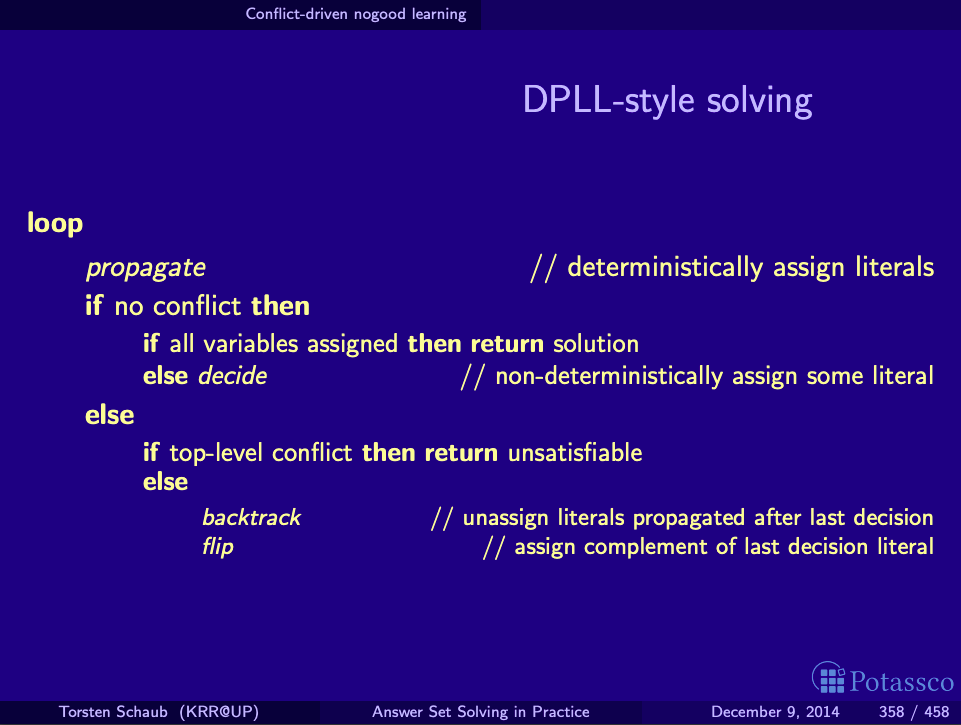

#### Design - the function `search(set_values)`

If there is a contradiction, we will return `False`

In [70]:
# 1. Apply the two heuristics
# 2. If `set_value` is `False`, return `False
# 3. If the `set_value` is solved, return `set_value`
# 4. If there is a contradiction, return `False`
# 5. Take a square with more than one digit.
#    Choose the one with the minimal number of options.
# 6. For every possible digit in the chosen square
#    1. Create a copy of `set_values`
#    2. Assign that digit in the square
#    3. Call `search` on the new `set_values`
#    4. If we get a non-False result, it means that is is a solution!
#       So return it
# 7. Otherwise, if no digit worked, return False

In [71]:
import copy

def search(set_values):
    
    set_values = eliminate_by_heuristics(set_values)
    
    if not set_values:
        return False

    elif all(len(v) == 1 for v in set_values.values()):
        return set_values

    elif any(len(v) == 0 for v in set_values.values()):
        return False

    n, s_to_search = min((len(v), s)
                         for s, v in set_values.items()
                         if len(v) > 1)

    for d in set_values[s_to_search]:
        new_set_values = copy.deepcopy(set_values) # explaind below

        new_set_values[s_to_search] = {d}
        
        result_set_values = search(new_set_values)
        
        if result_set_values:
            return result_set_values

    return False

In [72]:
sudoku1_set_values = generate_grid_set_values(sudoku1_grid)

sudoku1_set_values = search(sudoku1_set_values)

display_set(sudoku1_set_values)

4 8 3 |9 2 1 |6 5 7 
9 6 7 |3 4 5 |8 2 1 
2 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 3 2 |9 7 6 
7 2 9 |5 6 4 |1 3 8 
1 3 6 |7 9 8 |2 4 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |2 5 3 |7 6 9 
6 9 5 |4 1 7 |3 8 2 



In [73]:
sudoku2_set_values = generate_grid_set_values(sudoku2_grid)

sudoku2_set_values = search(sudoku2_set_values)

display_set(sudoku1_set_values)

4 8 3 |9 2 1 |6 5 7 
9 6 7 |3 4 5 |8 2 1 
2 5 1 |8 7 6 |4 9 3 
------+------+------
5 4 8 |1 3 2 |9 7 6 
7 2 9 |5 6 4 |1 3 8 
1 3 6 |7 9 8 |2 4 5 
------+------+------
3 7 2 |6 8 9 |5 1 4 
8 1 4 |2 5 3 |7 6 9 
6 9 5 |4 1 7 |3 8 2 



In [74]:
sudoku3_set_values = generate_grid_set_values(sudoku3_grid)

sudoku3_set_values = search(sudoku3_set_values)

display_set(sudoku3_set_values)

4 1 7 |3 6 9 |8 2 5 
6 3 2 |1 5 8 |9 4 7 
9 5 8 |7 2 4 |3 1 6 
------+------+------
8 2 5 |4 3 7 |1 6 9 
7 9 1 |5 8 6 |4 3 2 
3 4 6 |9 1 2 |7 5 8 
------+------+------
2 8 9 |6 4 3 |5 7 1 
5 7 3 |2 9 1 |6 8 4 
1 6 4 |8 7 5 |2 9 3 



### Important Note
- We need to create a copy of `set_values` for every call of `search`, otherwise we will work on the same object and perform multiple assignments.
- Using `set_values.copy()` will copy only the dictionary, but with the same values (`set`)
- We need a "deep" copy of the whole data structure


#### Shallow Copy

In [75]:
small_sudoku = {'A1': {'1', '2'},
                'B1': {'1'},
                'A2': {'2'},
                'B2': {'1', '2'}}

shallow_copy = small_sudoku.copy()

print(small_sudoku)
print(shallow_copy)

{'A1': {'2', '1'}, 'B1': {'1'}, 'A2': {'2'}, 'B2': {'2', '1'}}
{'A1': {'2', '1'}, 'B1': {'1'}, 'A2': {'2'}, 'B2': {'2', '1'}}


In [76]:
shallow_copy['B2'] -= {'1'}

print(small_sudoku)
print(shallow_copy)

{'A1': {'2', '1'}, 'B1': {'1'}, 'A2': {'2'}, 'B2': {'2'}}
{'A1': {'2', '1'}, 'B1': {'1'}, 'A2': {'2'}, 'B2': {'2'}}


#### Deep Copy

In [77]:
small_sudoku = {'A1': {'1', '2'},
                'B1': {'1'},
                'A2': {'2'},
                'B2': {'1', '2'}}

import copy

deep_copy = copy.deepcopy(small_sudoku)

print(small_sudoku)
print(deep_copy)

{'A1': {'2', '1'}, 'B1': {'1'}, 'A2': {'2'}, 'B2': {'2', '1'}}
{'A1': {'2', '1'}, 'B1': {'1'}, 'A2': {'2'}, 'B2': {'2', '1'}}


In [78]:
deep_copy['B2'] -= {'1'}

print(small_sudoku)
print(deep_copy)

{'A1': {'2', '1'}, 'B1': {'1'}, 'A2': {'2'}, 'B2': {'2', '1'}}
{'A1': {'2', '1'}, 'B1': {'1'}, 'A2': {'2'}, 'B2': {'2'}}


<div class="alert alert-success">
<h3>Execute the Program and Solve the Porblem!</h3>
</div>

<img src="https://secure.i.telegraph.co.uk/multimedia/archive/02260/Untitled-1_2260717b.jpg" />

In [79]:
%%time

world_hardest_sudoku_2012_grid = '8..........36......7..9.2...5...7.......457.....1...3...1....68..85...1..9....4..'

hardest_sudoku_set_values = generate_grid_set_values(world_hardest_sudoku_2012_grid)

hardest_sudoku_set_values = search(hardest_sudoku_set_values)

display_set(hardest_sudoku_set_values)

8 1 2 |7 5 3 |6 4 9 
9 4 3 |6 8 2 |1 7 5 
6 7 5 |4 9 1 |2 8 3 
------+------+------
1 5 4 |2 3 7 |8 9 6 
3 6 9 |8 4 5 |7 2 1 
2 8 7 |1 6 9 |5 3 4 
------+------+------
5 2 1 |9 7 4 |3 6 8 
4 3 8 |5 2 6 |9 1 7 
7 9 6 |3 1 8 |4 5 2 

CPU times: user 346 ms, sys: 4.92 ms, total: 351 ms
Wall time: 354 ms


<div class="alert alert-info">
<h3>Evaluate & Reflect</h3>
</div>

<div class="alert alert-warning">
  <h5>Evaluate</h5>

  Evaluate your solution (=code) according to the criteria:
  <ol>
    <li>Functionality</li>
    <li>Design & Code</li>
    <li>Readability, Style & Documentation</li>
  </ol>
</div>

- Messy notebook
- Non-elegant design
- The `False` return feels like an patch
- `is_changed`, `any_change` - Can it be done better?
- The code is quite nested, we should split it into more functions
- Is there a better design (Answer: **Yes**)
- Documentation!
- Better naming
- More testing

In [80]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


<div class="alert alert-warning">
<h5>Reflect</h5>

Reflect on your work.
</div>

### Feelings and Thinking
- It wasn't easy, and I feel I deserved something sweet at the end
- I took breaks while working on the problem, especially when I felt stuck
- Sometimes, I was too lazy to follow the model. In some cases there was no problem in the ode, in others after spending time in *programming by debugging*, I figure out that it would be beneficial to go back to first two phases - *Problem* and *Design* - and perform them methodically.
- I don't want to solve any Sudoku, manually or with Python for the next month (at least)!

### How did we solve the Problem? 

#### Design Strategy: Simplification & Generalization

- Sudoku
  - **The "peers" insight**
  - Simplified Problem - Latin Square
    - Simplest Problem  - Latin Square with only one missing square
      - Designing the first version of the "inner" data strucutre
      - Having our first heuristic!
  - Having our second heuristic!
  - **Re-designing the "inner" data strucutre, and **re-writing our code**
  - Discovering constraints propagation!
  - Oh... still not solved - we need a general design
  - Search with recursion
  - Mission Accomplished!

### Other Benefits
- Helped me to understand ASP a bit better for the exam

### Meta
- Practicing using the model and incremental development
- Problem solving and *the monster of our mind*

<div class="alert alert-info">
<h3>Repeat & Improve</h3>
</div>

### Do I need to *Repeat & Improve*?

> ### "Rewriting is the essence of writing." - William Zinsser

![](https://images-na.ssl-images-amazon.com/images/I/41qGbkrfIML._SX330_BO1,204,203,200_.jpg)

# Now, you can go and read the great [blog post](http://norvig.com/sudoku.html) of [Peter Norvig](https://en.wikipedia.org/wiki/Peter_Norvig)!
## His solution is elegant and well-written.

# Recommendad Reading: ["Claude Shannon: How a Genius Solves Problems"](https://medium.com/personal-growth/claude-shannon-how-a-real-genius-solves-problems-15b434aeb2b6) by Zat Rana


> ### "We could, for example, ask: What is the best way to solve this? But we could also ask: What is the worst way to solve this? Each contains knowledge, and we should dissect both."

<div class="alert alert-warning">
<h1>Think-Pair-Share - What is the worst way to solve Sudoku?</h1>

<h3>Why is it the worst way?</h3>
<h3>What can we learn out of it?</h3>

</div>

